In [1]:
import ROOT
%matplotlib inline
from ROOT import gROOT, TCanvas

Welcome to JupyROOT 6.30/04


## Open the file

In [2]:
# Specify the filename
filename = "run13688_crtana.root"

# Open the ROOT file
file = ROOT.TFile(filename)

# Check if the file is successfully opened
if file.IsOpen():
    print(f"File '{filename}' opened successfully.")
else:
    print(f"Failed to open file '{filename}'.")
    exit()

File 'run13688_crtana.root' opened successfully.


## Open the ttree manually to check its contents

In [3]:
# Navigate to the TDirectory "crtana"
crtana_dir = file.Get("crtana")

# Check if the directory is found
if not crtana_dir:
    print("Directory 'crtana' not found.")
    file.Close()
    exit()

# Navigate to the TTree "tree" within "crtana"
tree = crtana_dir.Get("tree")

# Check if the tree is found
if not tree:
    print("Tree 'tree' not found within 'crtana'.")
    file.Close()
    exit()

## Print out the names of branches in the tree
#print("Branches in the 'tree' TTree:")
#for branch in tree.GetListOfBranches():
#    print(branch.GetName())

## plot a branch!

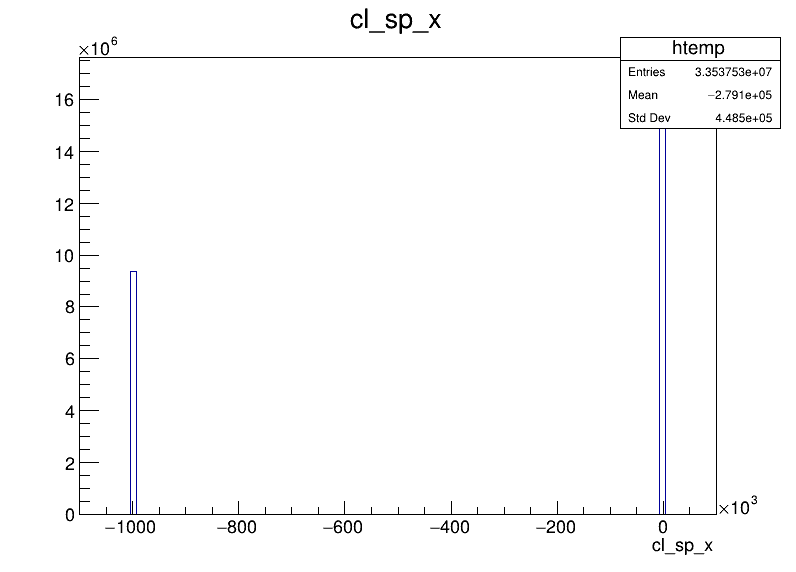

In [4]:
canvas1 = ROOT.TCanvas("canvas1", "Interactive Cut", 800, 600)
tree.Draw("cl_sp_x")
canvas1.Draw()

## plot cl_sp_x, ignoring the bogus negative values

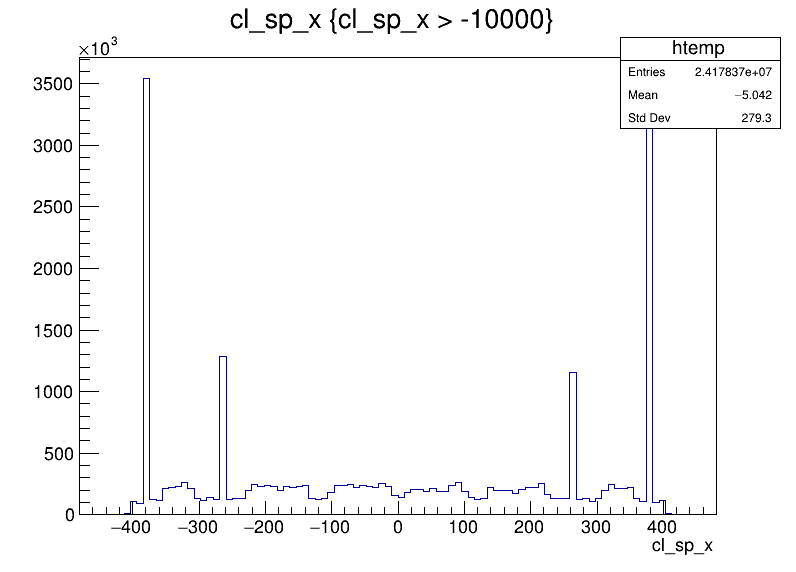

In [5]:
canvasx = ROOT.TCanvas("canvasx", "Interactive Cut", 800, 600)
tree.Draw("cl_sp_x", "cl_sp_x > -10000")
canvasx.Draw()

## Let's open it with a data frame and check that we get the same column names
#### this didn't work! That's ok, the other method did.

In [6]:
df = ROOT.RDataFrame(tree)
print(f"Columns in the dataset: {df.GetColumnNames()}")

Columns in the dataset: { "cl_composition", "cl_has_sp", "cl_nhits", "cl_sp_complete", "cl_sp_ets0", "cl_sp_ets1", "cl_sp_ex", "cl_sp_ey", "cl_sp_ez", "cl_sp_pe", "cl_sp_ts0", "cl_sp_ts1", "cl_sp_x", "cl_sp_y", "cl_sp_z", "cl_tagger", "cl_ts0", "cl_ts1", "cl_unixs", "event", "feb_adc", "feb_coinc", "feb_flags", "feb_mac5", "feb_tagger", "feb_ts0", "feb_ts1", "feb_unixs", "ptb_hlt_timestamp", "ptb_hlt_trigger", "ptb_llt_timestamp", "ptb_llt_trigger", "run", "sh_adc1", "sh_adc2", "sh_channel", "sh_err", "sh_pos", "sh_saturated1", "sh_saturated2", "sh_tagger", "sh_ts0", "sh_ts1", "sh_unixs", "subrun", "tdc_channel", "tdc_name", "tdc_offset", "tdc_timestamp", "tr_dir_x", "tr_dir_y", "tr_dir_z", "tr_end_x", "tr_end_y", "tr_end_z", "tr_ets0", "tr_ets1", "tr_length", "tr_pe", "tr_phi", "tr_start_x", "tr_start_y", "tr_start_z", "tr_tagger1", "tr_tagger2", "tr_tagger3", "tr_theta", "tr_tof", "tr_triple", "tr_ts0", "tr_ts1" }


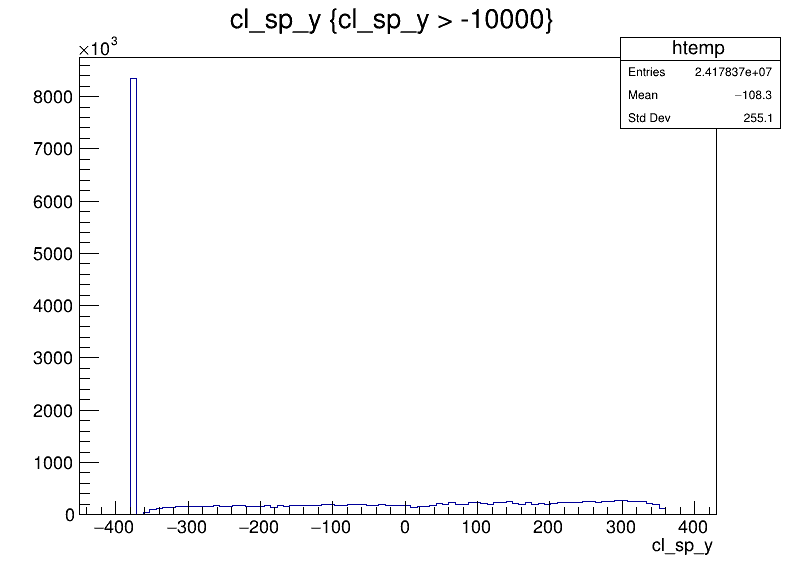

In [7]:
canvasy = ROOT.TCanvas("canvasy", "Interactive Cut", 800, 600)
tree.Draw("cl_sp_y", "cl_sp_y > -10000")
canvasy.Draw()

## plot cl_sp_y and cl_sp_z, ignoring the bogus negative values

In [8]:
# Filter the dataframe based on specific conditions
# Example: Filter entries where 'filename' column matches a specific value
#df_filtered = df.Filter("tree.Contains('cl_sp_')")
#def filter(branch):
   # return "cl_sp" in branch

#df = df.Define("cl_sp_filter", filter, "tree")

# Filter the dataframe based on the new column
#df_filtered = df.Filter("cl_sp_filter == true")


#df_filtered = df.Filter(filter,df.GetColumnNames())

#print(f"Columns in the updated dataset: {df_filtered.GetColumnNames()}")

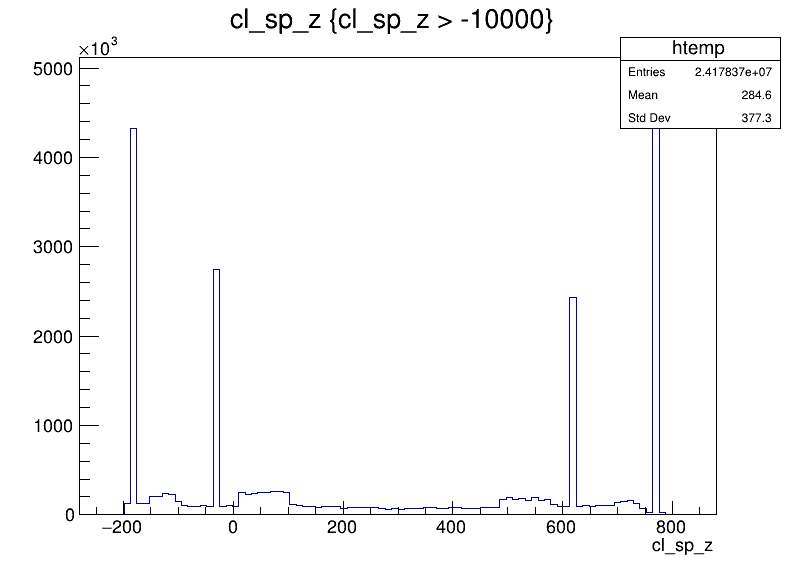

In [9]:
canvasz = ROOT.TCanvas("canvasz", "Interactive Cut", 800, 600)
tree.Draw("cl_sp_z", "cl_sp_z > -10000")
canvasz.Draw()

In [5]:
from ROOT import TH3D

# Create a 3D histogram
hist22 = TH3D("hist22", "3D Plot", 200, -400, 400, 200, -400, 400, 200, -200, 800)

## Here we are creating a 3D Histogram showing where the hits on the detector box are

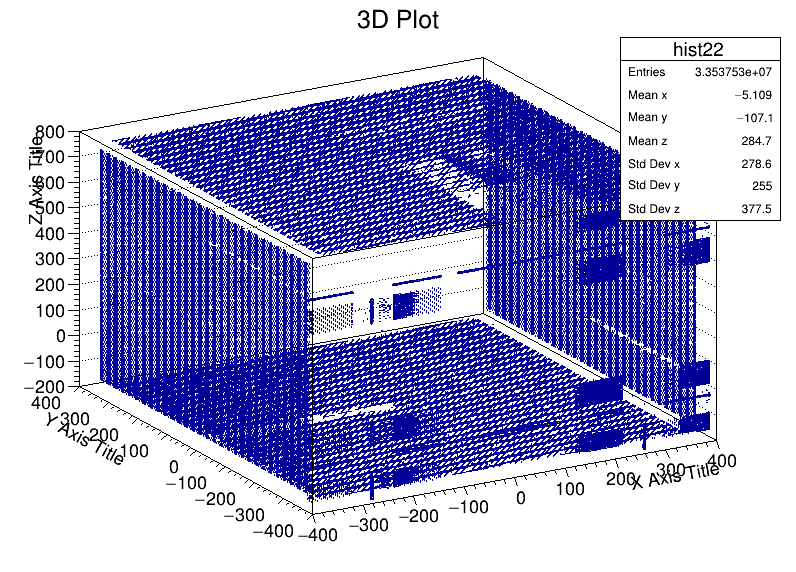

In [11]:
for i in range(tree.GetEntries()):  # Assuming `tree` is a TTree
#for i in range(1000):
    tree.GetEntry(i)  # Get the entry `i` from the tree

    # Check the condition `cl_has_cp >= 1`
   # if tree.cl_has_sp:
        # Fill the histogram with the values from the tree
      #  hist22.Fill(tree.cl_sp_x, tree.cl_sp_y, tree.cl_sp_z)

    if tree.cl_has_sp:
        # Assuming `tree.cl_sp_x`, `tree.cl_sp_y`, and `tree.cl_sp_z` are vectors
        # Loop over each element in the vectors and fill the histogram
        for j in range(len(tree.cl_sp_x)):
            hist22.Fill(tree.cl_sp_x[j], tree.cl_sp_y[j], tree.cl_sp_z[j])
# Set labels for the x, y, and z axes
hist22.GetXaxis().SetTitle("X Axis Title")
hist22.GetYaxis().SetTitle("Y Axis Title")
hist22.GetZaxis().SetTitle("Z Axis Title")

canvas22 = ROOT.TCanvas("canvas22", "Histogram Canvas", 800, 600)
hist22.Draw()  
canvas22.Draw()

In [12]:
import ROOT

# Load the ROOT magic for Jupyter
%jsroot on

# Specify the filename
filename = "run13688_crtana.root"

# Open the ROOT file
file = ROOT.TFile(filename)

# Navigate to the TDirectory "crtana"
crtana_dir = file.Get("crtana")

# Navigate to the TTree "tree" within "crtana"
tree = crtana_dir.Get("tree")

from ROOT import TH3D

# Create a 3D histogram
hists = TH3D("hists", "3D Plot", 50, -400, 400, 50, -400, 400, 50, -200, 800)

for i in range(1000):  # Adjust the range if needed
    tree.GetEntry(i)  # Get the entry `i` from the tree

    if tree.cl_has_sp:
        # Assuming `tree.cl_sp_x`, `tree.cl_sp_y`, and `tree.cl_sp_z` are vectors
        # Loop over each element in the vectors and fill the histogram
        for j in range(len(tree.cl_sp_x)):
            hists.Fill(tree.cl_sp_x[j], tree.cl_sp_y[j], tree.cl_sp_z[j])

# Set labels for the x, y, and z axes
hists.GetXaxis().SetTitle("X Axis Title")
hists.GetYaxis().SetTitle("Y Axis Title")

# Create a canvas
canvass = ROOT.TCanvas("canvass", "Histogram Canvas", 800, 600)

# Draw the histogram
hists.Draw("LEGO2")  # Use LEGO2 option for a 3D plot

# Display the canvas
canvass.Draw()


## 1D Histogram representing the Counts on the x-axis at the z value of -200

In [13]:
import ROOT
%jsroot on

# Your existing code to create and fill the histogram
histogram = ROOT.TH1D("histogram1D", "1D Histogram", 20, -400, 400)
for i in range(tree.GetEntries()):
    tree.GetEntry(i)
    if tree.cl_has_sp:
        for j in range(len(tree.cl_sp_x)):
            x = tree.cl_sp_x[j]
            #y = tree.cl_sp_y[j]
            z = tree.cl_sp_z[j]
            if (-250 <z < -150):
                histogram.Fill(x)

# Set axis labels
histogram.GetXaxis().SetTitle("X")


# Draw the histogram
c1 = ROOT.TCanvas("c", "1D Histogram", 800, 600)
histogram.Draw()
c1.Draw()

# 2D and 1D Histograms looking at the each face of the detector
### YZ (sides), XY (front and back), XZ (top and bottom)

In [4]:
import ROOT
%jsroot on

# Specify the filename
filename = "run13688_crtana.root"

# Open the ROOT file
file = ROOT.TFile(filename)

# Navigate to the TDirectory "crtana"
crtana_dir = file.Get("crtana")

# Navigate to the TTree "tree" within "crtana"
tree = crtana_dir.Get("tree")

from ROOT import TH2D
from ROOT import TH1D

In [7]:
histsy = TH1D("Y+", "Y of YZ face with X+ (Left)", 50, -400, 400)
histsz = TH1D("Z+", "Z of YZ face with X+ (Left)", 50, -200, 800)
histsyz = TH2D("YZ+", "YZ 2D Plot for X+ (Left) Face", 50, -400, 400, 50, -200, 800)

histsY = TH1D("Y-", "Y of the YZ face with X- (Right)", 50, -400, 400)
histsZ = TH1D("Z-", "Z of YZ face with X- (Right)", 50, -200, 800)
histsYZ = TH2D("YZ-", "YZ 2D Plot for X- Face (Right)", 50, -400, 400, 50, -200, 800)

for i in range(tree.GetEntries()):  # Adjust the range if needed
    tree.GetEntry(i)  # Get the entry `i` from the tree

    if tree.cl_has_sp:
        # Assuming `tree.cl_sp_x`, `tree.cl_sp_y`, and `tree.cl_sp_z` are vectors
        # Loop over each element in the vectors and fill the histogram
        for j in range(len(tree.cl_sp_x)):
            if 300<tree.cl_sp_x[j]<400:
                histsyz.Fill(tree.cl_sp_y[j], tree.cl_sp_z[j])
                histsy.Fill(tree.cl_sp_y[j])
                histsz.Fill(tree.cl_sp_z[j])
            if -400<tree.cl_sp_x[j]<-300:
                histsYZ.Fill(tree.cl_sp_y[j], tree.cl_sp_z[j])
                histsY.Fill(tree.cl_sp_y[j])
                histsZ.Fill(tree.cl_sp_z[j])
                
# Set labels for the x, y, and z axes
histsyz.GetXaxis().SetTitle("Y Axis (cm)")
histsyz.GetYaxis().SetTitle("Z Axis (cm)")
histsYZ.GetXaxis().SetTitle("Y Axis (cm)")
histsYZ.GetYaxis().SetTitle("Z Axis (cm)")
histsy.GetXaxis().SetTitle("Y Axis (cm)")
histsy.GetYaxis().SetTitle("Hits")
histsY.GetXaxis().SetTitle("Y Axis (cm)")
histsY.GetYaxis().SetTitle("Hits")
histsz.GetXaxis().SetTitle("Z Axis (cm)")
histsz.GetYaxis().SetTitle("Hits")
histsZ.GetXaxis().SetTitle("Z Axis (cm)")
histsZ.GetYaxis().SetTitle("Hits")

canvasy = ROOT.TCanvas("canvasy", "Histogram Canvas", 500, 500)
canvasy.SetLogy()
histsy.Draw("colz")

canvasz = ROOT.TCanvas("canvasz", "Histogram Canvas", 500, 500)
canvasz.SetLogy()
histsz.Draw("colz")

canvasyz = ROOT.TCanvas("canvasyz", "Histogram Canvas", 500, 500)
canvasyz.SetLogz()
histsyz.Draw("colz")  # Use LEGO2 option for a 3D plot

canvasY = ROOT.TCanvas("canvasY", "Histogram Canvas", 500, 500)
canvasY.SetLogy()
histsY.Draw("colz")

canvasZ = ROOT.TCanvas("canvasZ", "Histogram Canvas", 500, 500)
canvasZ.SetLogy()
histsZ.Draw("colz")

canvasYZ = ROOT.TCanvas("canvasYZ", "Histogram Canvas", 500, 500)
canvasYZ.SetLogz()
histsYZ.Draw("colz")


canvasYZ.Draw()
canvasYZ.SaveAs("YZ Right Face.png")
canvasY.Draw()
canvasY.SaveAs("YZ Right Face Y.png")
canvasyz.Draw()
canvasyz.SaveAs("YZ Left Face.png")
canvasy.Draw()
canvasy.SaveAs("YZ Left Face Y.png")
canvasz.Draw()
canvasz.SaveAs("YZ Left Face Z.png")
canvasZ.Draw()
canvasZ.SaveAs("YZ Right Face Z.png")

Warning in <TFile::Append>: Replacing existing TH1: Y+ (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Z+ (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: YZ+ (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Y- (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Z- (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: YZ- (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasy
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasz
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasyz
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasY
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasZ
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasYZ
Info in <TCanvas::Print>: png file YZ Right Face.png has been crea

In [20]:
histsx = TH1D("X+", "X of XY face with Z+ (Back)", 50, -400, 400)
histsy = TH1D("Y+", "Y of XY face with Z+ (Back)", 50, -400, 400)
histsxy = TH2D("XY+", "XY 2D Plot for Z+ (Back) Face", 50, -400, 400, 50, -400, 400)
histsX = TH1D("X-", "X of XY face with Z- (Front)", 50, -400, 400)
histsY = TH1D("Y-", "Y of XY face with Z- (Front)", 50, -400, 400)
histsXY = TH2D("XY-", "XY 2D Plot for Z- (Front) Face", 50, -400, 400, 50, -400, 400)

#for i in range(tree.GetEntries()):  # Adjust the range if needed
for i in range(1000):
    tree.GetEntry(i)  # Get the entry `i` from the tree

    if tree.cl_has_sp:
        # Assuming `tree.cl_sp_x`, `tree.cl_sp_y`, and `tree.cl_sp_z` are vectors
        # Loop over each element in the vectors and fill the histogram
        for j in range(len(tree.cl_sp_x)):
            if 700<tree.cl_sp_z[j]<800:
                histsxy.Fill(tree.cl_sp_x[j], tree.cl_sp_y[j])
                histsx.Fill(tree.cl_sp_x[j])
                histsy.Fill(tree.cl_sp_y[j])
            if -200<tree.cl_sp_z[j]<-100:
                histsXY.Fill(tree.cl_sp_x[j], tree.cl_sp_y[j])
                histsX.Fill(tree.cl_sp_x[j])
                histsY.Fill(tree.cl_sp_y[j])

# Set labels for the x, y, and z axes
histsxy.GetXaxis().SetTitle("X Axis (cm)")
histsxy.GetYaxis().SetTitle("Y Axis (cm)")
histsXY.GetXaxis().SetTitle("X Axis")
histsXY.GetYaxis().SetTitle("Y Axis")
histsx.GetXaxis().SetTitle("X Axis")
histsy.GetXaxis().SetTitle("Y Axis")
histsX.GetXaxis().SetTitle("X Axis")
histsY.GetXaxis().SetTitle("Y Axis")

canvasx = ROOT.TCanvas("canvasx", "Histogram Canvas", 800, 600)
canvasx.SetLogy()
histsx.Draw("colz")  # Use LEGO2 option for a 3D plot
fit1 = histsx.Fit("gaus", "S")
fit1.Print()

canvasy = ROOT.TCanvas("canvasy", "Histogram Canvas", 800, 600)
canvasy.SetLogy()
histsy.Draw("colz")  # Use LEGO2 option for a 3D plot

canvasxy = ROOT.TCanvas("canvasxy", "Histogram Canvas", 800, 600)
canvasxy.SetLogz()
histsxy.Draw("colz")  # Use LEGO2 option for a 3D plot

canvasX = ROOT.TCanvas("canvasX", "Histogram Canvas", 800, 600)
canvasX.SetLogy()
histsX.Draw("colz")  # Use LEGO2 option for a 3D plot

canvasY = ROOT.TCanvas("canvasY", "Histogram Canvas", 800, 600)
canvasY.SetLogy()
histsY.Draw("colz")  # Use LEGO2 option for a 3D plot

canvasXY = ROOT.TCanvas("canvasXY", "Histogram Canvas", 800, 600)
canvasXY.SetLogz()
histsXY.Draw("colz")  # Use LEGO2 option for a 3D plot

# Display the canvas
canvasxy.Draw()
canvasXY.Draw()
canvasy.Draw()
canvasY.Draw()
canvasx.Draw()
canvasX.Draw()

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      24000.8
NDf                       =           46
Edm                       =  2.43478e-09
NCalls                    =          107
Constant                  =      3032.47   +/-   10.8392     
Mean                      =     -91.7714   +/-   2.37377     
Sigma                     =      371.483   +/-   2.80186      	 (limited)
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      24000.8
NDf                       =           46
Edm                       =  2.43478e-09
NCalls                    =          107
Constant                  =      3032.47   +/-   10.8392     
Mean                      =     -91.7714   +/-   2.37377     
Sigma                     =      371.483   +/-   2.80186      	 (limited)


Warning in <TFile::Append>: Replacing existing TH1: X+ (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Y+ (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: XY+ (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: X- (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Y- (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: XY- (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasx
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasy
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasxy
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasX
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasY
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasXY


In [17]:
histsx = TH1D("X-", "X 1D Plot for Y- Face", 50, -400, 400)
histsz = TH1D("Z-", "Z 1D Plot for Y- Face", 50, -200, 800)
histsxz = TH2D("XZ-", "XZ 2D Plot for Y- Face", 50, -400, 400, 50, -200, 800)
histsX = TH1D("X+", "X 1D Plot for Y+ Face", 50, -400, 400)
histsZ = TH1D("Z+", "Z 1D Plot for Y+ Face", 50, -200, 800)
histsXZ = TH2D("XZ+", "XZ 2D Plot for Y+ Face", 50, -400, 400, 50, -200, 800)

for i in range(tree.GetEntries()):  # Adjust the range if needed
    tree.GetEntry(i)  # Get the entry `i` from the tree

    if tree.cl_has_sp:
        # Assuming `tree.cl_sp_x`, `tree.cl_sp_y`, and `tree.cl_sp_z` are vectors
        # Loop over each element in the vectors and fill the histogram
        for j in range(len(tree.cl_sp_x)):
            if -400<tree.cl_sp_y[j]<-300:
                histsxz.Fill(tree.cl_sp_x[j], tree.cl_sp_z[j])
                histsx.Fill(tree.cl_sp_x[j])
                histsz.Fill(tree.cl_sp_z[j])
            if 300<tree.cl_sp_y[j]<400:
                histsXZ.Fill(tree.cl_sp_x[j], tree.cl_sp_z[j])
                histsX.Fill(tree.cl_sp_x[j])
                histsZ.Fill(tree.cl_sp_z[j])

# Set labels for the x, y, and z axes
histsxz.GetXaxis().SetTitle("X Axis")
histsxz.GetYaxis().SetTitle("Z Axis")
histsXZ.GetXaxis().SetTitle("X Axis")
histsXZ.GetYaxis().SetTitle("Z Axis")
histsx.GetXaxis().SetTitle("X Axis")
histsz.GetXaxis().SetTitle("Z Axis")
histsX.GetXaxis().SetTitle("X Axis")
histsZ.GetXaxis().SetTitle("Z Axis")

canvasx = ROOT.TCanvas("canvasx", "Histogram Canvas", 800, 600)
canvasx.SetLogy()
histsx.Draw("colz")  # Use LEGO2 option for a 3D plot

canvasz = ROOT.TCanvas("canvasz", "Histogram Canvas", 800, 600)
canvasz.SetLogy()
histsz.Draw("colz")  # Use LEGO2 option for a 3D plot

canvasxz = ROOT.TCanvas("canvasxz", "Histogram Canvas", 800, 600)
canvasxz.SetLogz()
histsxz.Draw("colz")  # Use LEGO2 option for a 3D plot

canvasX = ROOT.TCanvas("canvasX", "Histogram Canvas", 800, 600)
canvasX.SetLogy()
histsX.Draw("colz")  # Use LEGO2 option for a 3D plot

canvasZ = ROOT.TCanvas("canvasZ", "Histogram Canvas", 800, 600)
canvasZ.SetLogy()
histsZ.Draw("colz")  # Use LEGO2 option for a 3D plot

canvasXZ = ROOT.TCanvas("canvasXZ", "Histogram Canvas", 800, 600)
canvasXZ.SetLogz()
histsXZ.Draw("colz")  # Use LEGO2 option for a 3D plot


# Display the canvas
canvasxz.Draw()
canvasXZ.Draw()
canvasz.Draw()
canvasZ.Draw()
canvasx.Draw()
canvasX.Draw()

Warning in <TFile::Append>: Replacing existing TH1: X- (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Z- (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasx
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasz
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasX
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasZ


## CRTana Time Data

In [5]:
import ROOT
from ROOT import TH1D
%jsroot on

min_time = 1520E3
max_time = 1540E3
nbins = 300
#t0_hist = ROOT.TH1D("t0_hist", "1D Histogram", nbins, min_time, max_time)
t1_hist = ROOT.TH1D("t1_hist", "1D Histogram", nbins, min_time, max_time)
#t_diff = ROOT.TH1D("time_diff", "1D Histogram", nbins, min_time, max_time)
#first_entry_times = ROOT.TH1D("first_times", "1D Histogram", 300, 1e8, 2e9)
n_entries = tree.GetEntries()
#n_entries = 2500
for i in range(n_entries):
    tree.GetEntry(i)
    plotted_first = False
    if tree.cl_has_sp:
        for j in range(len(tree.cl_sp_ts0)):
            t0 = tree.cl_sp_ts0[j]
            t1 = tree.cl_sp_ts1[j]
            #if(t0>0 and not plotted_first):
                #first_entry_times.Fill(t0)
            #if(t0>0):
                #t0_hist.Fill(t0)
            if(t1>0):
                t1_hist.Fill(t1)
            #if(t0>0 and t1>0):
                #t_diff.Fill(t0 - t1)
        plotted_first = True

# Set axis labels
#t0_hist.GetXaxis().SetTitle("t (ns?)")
t1_hist.GetXaxis().SetTitle("t (ns)")
#t_diff.GetXaxis().SetTitle("t (ns?)")
#first_entry_times.GetXaxis().SetTitle("t (ns?)")

#t0_hist.SetTitle("t0")
t1_hist.SetTitle("t1")
#t_diff.SetTitle("t0 - t1")
#first_entry_times.SetTitle("t0 distribution for single event")


# Draw the histogram
#c1 = ROOT.TCanvas("c1", "1D Histogram", 800, 600)
#t0_hist.Draw()
#c1.Draw()
#c1.SaveAs("t0.png")

c2 = ROOT.TCanvas("c2", "1D Histogram", 800, 600)
t1_hist.Draw()
c2.Draw()
c2.SaveAs("t1.png")

#c3 = ROOT.TCanvas("c3", "1D Histogram", 800, 600)
#t_diff.Draw()
#c3.Draw()
#c3.SaveAs("t_diff.png")

#c4 = ROOT.TCanvas("c4", "1D Histogram", 800, 600)
#first_entry_times.Draw()
#c4.Draw()
#c4.SaveAs("first.png")

Info in <TCanvas::Print>: png file t1.png has been created


In [ ]:
from ROOT import TH1D, TH2D, TCanvas

# Assuming `tree` is your TTree object with branches like `cl_sp_x`, `cl_sp_y`, etc.
# Initialize histograms
histsx = TH1D("X+", "X of XY face with Z+", 10, -400, 400)
histsy = TH1D("Y+", "Y of XY face with Z+", 10, -400, 400)
histsxy = TH2D("XY+", "XY 2D Plot for Z+ Face", 10, -400, 400, 10, -400, 400)
histsX = TH1D("X-", "X of XY face with Z-", 10, -400, 400)
histsY = TH1D("Y-", "Y of XY face with Z-", 10, -400, 400)
histsXY = TH2D("XY-", "XY 2D Plot for Z- Face", 10, -400, 400, 10, -400, 400)

# Loop over entries in the tree
#for i in range(tree.GetEntries()):  # Adjust the range if needed
for i in range(2000):
    tree.GetEntry(i)  # Get the entry `i` from the tree

    if tree.cl_has_sp:
        # Loop over elements in the vectors (assuming cl_sp_x, cl_sp_y, cl_sp_z are vectors)
        for j in range(len(tree.cl_sp_x)):
            # Assign t1 within the loop to get the current value for each j
            t1 = tree.cl_sp_ts1[j]

            if 700 < tree.cl_sp_z[j] < 800 and 1529733 < t1 < 1532800:
                histsxy.Fill(tree.cl_sp_x[j], tree.cl_sp_y[j])
                histsx.Fill(tree.cl_sp_x[j])
                histsy.Fill(tree.cl_sp_y[j])
            if -200 < tree.cl_sp_z[j] < -100 and 1529E3 < t1 < 1534E3:
                histsXY.Fill(tree.cl_sp_x[j], tree.cl_sp_y[j])
                histsX.Fill(tree.cl_sp_x[j])
                histsY.Fill(tree.cl_sp_y[j])

# Set labels for the histograms
histsxy.GetXaxis().SetTitle("X Axis")
histsxy.GetYaxis().SetTitle("Y Axis")
histsXY.GetXaxis().SetTitle("X Axis")
histsXY.GetYaxis().SetTitle("Y Axis")
histsx.GetXaxis().SetTitle("X Axis")
histsy.GetXaxis().SetTitle("Y Axis")
histsX.GetXaxis().SetTitle("X Axis")
histsY.GetXaxis().SetTitle("Y Axis")

# Define 2D Gaussian function
f2D = ROOT.TF2("f2D", "[0]exp(-0.5((x-[1])/[2])**2)exp(-0.5((y-[3])/[4])**2)", -400, 400, -200, 800)
f2D.SetParameters(1, 0, 100, 0, 100)


# Create canvases and draw histograms
canvasx = TCanvas("canvasx", "Histogram Canvas", 800, 600)
canvasx.SetLogy()
histsx.Draw("colz")
fit1 = histsx.Fit("gaus", "S")
fit1.Print()

canvasy = TCanvas("canvasy", "Histogram Canvas", 800, 600)
canvasy.SetLogy()
histsy.Draw("colz")
fit2 = histsy.Fit("gaus", "S")
fit2.Print()

canvasxy = TCanvas("canvasxy", "Histogram Canvas", 800, 600)
canvasxy.SetLogz()
histsxy.Draw("colz")
histsxy.Fit(f2D, "S")
f2D.Print()


canvasX = TCanvas("canvasX", "Histogram Canvas", 800, 600)
canvasX.SetLogy()
histsX.Draw("colz")
fit4 = histsX.Fit("gaus", "S")
fit4.Print()

canvasY = TCanvas("canvasY", "Histogram Canvas", 800, 600)
canvasY.SetLogy()
histsY.Draw("colz")
fit5 = histsY.Fit("gaus", "S")
fit5.Print()

canvasXY = TCanvas("canvasXY", "Histogram Canvas", 800, 600)
canvasXY.SetLogz()
histsXY.Draw("colz")
histsXY.Fit(f2D, "S")
f2D.Print()


# Display the canvases
canvasxy.Draw()
canvasXY.Draw()
canvasy.Draw()
canvasY.Draw()
canvasx.Draw()
canvasX.Draw()


In [ ]:
histsy = TH1D("Y+", "Y of YZ face with X+", 50, -400, 400)
histsz = TH1D("Z+", "Z of YZ face with X+", 50, -200, 800)
histsyz = TH2D("YZ+", "YZ 2D Plot for X+ Face", 50, -400, 400, 50, -200, 800)

histsY = TH1D("Y-", "Y of the YZ face with X-", 50, -400, 400)
histsZ = TH1D("Z-", "Z of YZ face with X-", 50, -200, 800)
histsYZ = TH2D("YZ-", "YZ 2D Plot for X- Face", 50, -400, 400, 50, -200, 800)

#for i in range(tree.GetEntries()):  # Adjust the range if needed
for i in range(1000):
    tree.GetEntry(i)  # Get the entry `i` from the tree

    if tree.cl_has_sp:
        # Assuming `tree.cl_sp_x`, `tree.cl_sp_y`, and `tree.cl_sp_z` are vectors
        # Loop over each element in the vectors and fill the histogram
        for j in range(len(tree.cl_sp_x)):
            t1 = tree.cl_sp_ts1[j]
            if 300<tree.cl_sp_x[j]<400 and 1529733 < t1 < 1532800:
                histsyz.Fill(tree.cl_sp_y[j], tree.cl_sp_z[j])
                histsy.Fill(tree.cl_sp_y[j])
                histsz.Fill(tree.cl_sp_z[j])
            if -400<tree.cl_sp_x[j]<-300 and 1529733 < t1 < 1532800:
                histsYZ.Fill(tree.cl_sp_y[j], tree.cl_sp_z[j])
                histsY.Fill(tree.cl_sp_y[j])
                histsZ.Fill(tree.cl_sp_z[j])
                
# Set labels for the x, y, and z axes
histsyz.GetXaxis().SetTitle("Y Axis")
histsyz.GetYaxis().SetTitle("Z Axis")
histsYZ.GetXaxis().SetTitle("Y Axis")
histsYZ.GetYaxis().SetTitle("Z Axis")
histsy.GetXaxis().SetTitle("Y Axis")
histsY.GetXaxis().SetTitle("Y Axis")
histsz.GetXaxis().SetTitle("Z Axis")
histsZ.GetXaxis().SetTitle("Z Axis")

canvasy = ROOT.TCanvas("canvasy", "Histogram Canvas", 600, 400)
canvasy.SetLogy()
histsy.Draw("colz")

canvasz = ROOT.TCanvas("canvasz", "Histogram Canvas", 600, 400)
canvasz.SetLogy()
histsz.Draw("colz")

canvasyz = ROOT.TCanvas("canvasyz", "Histogram Canvas", 600, 400)
canvasyz.SetLogz()
histsyz.Draw("colz")  # Use LEGO2 option for a 3D plot

canvasY = ROOT.TCanvas("canvasY", "Histogram Canvas", 600, 400)
canvasY.SetLogy()
histsY.Draw("colz")

canvasZ = ROOT.TCanvas("canvasZ", "Histogram Canvas", 600, 400)
canvasZ.SetLogy()
histsZ.Draw("colz")

canvasYZ = ROOT.TCanvas("canvasYZ", "Histogram Canvas", 600, 400)
canvasYZ.SetLogz()
histsYZ.Draw("colz")


canvasYZ.Draw()
canvasY.Draw()
canvasyz.Draw()
canvasy.Draw()
canvasz.Draw()
canvasZ.Draw()